<a href="https://colab.research.google.com/github/Nagasuri-Srinivas/CVD-Project/blob/main/Another_copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install optuna tensorflow scikit-learn numpy pandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
class CardiovascularDataGenerator:
    def __init__(self, seed=42):
        self.seed = seed
        np.random.seed(seed)
        random.seed(seed)

        self.ranges = {
            'age': (20, 90),
            'systolic_bp': (90, 180),
            'diastolic_bp': (60, 120),
            'heart_rate': (60, 100),
            'cholesterol': (150, 300),
            'glucose': (70, 200),
            'bmi': (18.5, 40),
        }

    def _generate_age(self, size):
        return np.random.normal(loc=55, scale=15, size=size).clip(
            self.ranges['age'][0], self.ranges['age'][1])

    def _generate_blood_pressure(self, age, size):
        systolic_base = 110 + 0.4 * age + np.random.normal(0, 10, size)
        diastolic_base = 70 + 0.2 * age + np.random.normal(0, 8, size)

        systolic = systolic_base.clip(self.ranges['systolic_bp'][0],
                                    self.ranges['systolic_bp'][1])
        diastolic = diastolic_base.clip(self.ranges['diastolic_bp'][0],
                                      self.ranges['diastolic_bp'][1])

        return systolic, diastolic

    def _generate_heart_rate(self, age, size):
        base_rate = 75 - 0.1 * age + np.random.normal(0, 8, size)
        return base_rate.clip(self.ranges['heart_rate'][0],
                            self.ranges['heart_rate'][1])

    def _generate_features(self, size):
        age = self._generate_age(size)
        systolic, diastolic = self._generate_blood_pressure(age, size)
        heart_rate = self._generate_heart_rate(age, size)

        gender = np.random.choice([0, 1], size=size)  # 0: Female, 1: Male
        cholesterol = np.random.normal(200, 30, size).clip(150, 300)
        glucose = np.random.normal(100, 20, size).clip(70, 200)
        bmi = np.random.normal(25, 5, size).clip(18.5, 40)
        smoking = np.random.choice([0, 1], size=size, p=[0.7, 0.3])
        alcohol = np.random.choice([0, 1], size=size, p=[0.6, 0.4])
        exercise = np.random.choice([0, 1, 2], size=size, p=[0.3, 0.4, 0.3])

        return pd.DataFrame({
            'age': age,
            'gender': gender,
            'systolic_bp': systolic,
            'diastolic_bp': diastolic,
            'heart_rate': heart_rate,
            'cholesterol': cholesterol,
            'glucose': glucose,
            'bmi': bmi,
            'smoking': smoking,
            'alcohol': alcohol,
            'exercise': exercise,
        })

    def generate_dataset(self, size=1000):
        data = self._generate_features(size)

        # Calculate target (CVD risk) based on features
        risk = (
            0.02 * data['age'] +
            0.1 * data['gender'] +
            0.01 * (data['systolic_bp'] - 120) +
            0.01 * (data['diastolic_bp'] - 80) +
            0.02 * ((data['cholesterol'] - 200) / 40) +
            0.02 * ((data['glucose'] - 100) / 20) +
            0.1 * data['smoking'] +
            0.05 * data['alcohol'] +
            0.1 * (data['bmi'] > 30)
        )

        # Normalize risk to [0, 1] and create binary target
        risk = (risk - risk.min()) / (risk.max() - risk.min())
        data['target'] = (risk > 0.5).astype(int)

        return data



In [ ]:
class AttentionBlock(layers.Layer):
    def __init__(self, units):
        super(AttentionBlock, self).__init__()
        self.W = layers.Dense(units)
        self.V = layers.Dense(1)

    def call(self, inputs):
        score = tf.nn.tanh(self.W(inputs))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * inputs
        return context_vector

class EnhancedDeepLearningNetwork:
    def __init__(self, input_shape):
        self.model = self._build_model(input_shape)

    def _build_model(self, input_shape):
        inputs = layers.Input(shape=input_shape)

        # First block
        x = layers.Dense(128, activation='relu')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
        x = AttentionBlock(128)(x)

        # Second block
        x = layers.Dense(64, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.2)(x)
        x = AttentionBlock(64)(x)

        outputs = layers.Dense(1, activation='sigmoid')(x)

        model = Model(inputs=inputs, outputs=outputs)
        return model


In [ ]:

    def compile_model(self, learning_rate=0.001):
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.model.compile(
            optimizer=optimizer,
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

    def train(self, X_train, y_train, X_val, y_val, batch_size=32, epochs=100):
        early_stopping = EarlyStopping(
            monitor='val_accuracy',
            patience=10,
            restore_best_weights=True
        )

        history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            batch_size=batch_size,
            epochs=epochs,
            callbacks=[early_stopping],
            verbose=1
        )
        return history


In [ ]:
generator = CardiovascularDataGenerator(seed=42)
data = generator.generate_dataset(size=10000)
print("Dataset generated successfully!")
print("\nDataset shape:", data.shape)

# Split features and target
X = data.drop('target', axis=1)
y = data['target']

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Data preparation completed!")


Dataset generated successfully!

Dataset shape: (10000, 12)
Data preparation completed!


In [ ]:
model = EnhancedDeepLearningNetwork(input_shape=(X_train.shape[1],))
model.compile_model(learning_rate=0.001)

history = model.train(
    X_train_scaled, y_train,
    X_val_scaled, y_val,
    batch_size=32,
    epochs=50
)

# Evaluate model
y_pred = (model.model.predict(X_test_scaled) > 0.5).astype(int)

metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1_score': f1_score(y_test, y_pred)
}

print("\nModel Performance:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8388 - loss: 0.3491 - val_accuracy: 0.9713 - val_loss: 0.1412
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9228 - loss: 0.1769 - val_accuracy: 0.9760 - val_loss: 0.0856
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9341 - loss: 0.1462 - val_accuracy: 0.9873 - val_loss: 0.0672
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9368 - loss: 0.1413 - val_accuracy: 0.9827 - val_loss: 0.0658
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9481 - loss: 0.1112 - val_accuracy: 0.9840 - val_loss: 0.0631
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9536 - loss: 0.1173 - val_accuracy: 0.9867 - val_loss: 0.0554
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9557 - loss: 0.1089 - val_accuracy: 0.9867 - val_loss: 0.0502
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9590 - loss: 0.0988 - val_accuracy: 0.

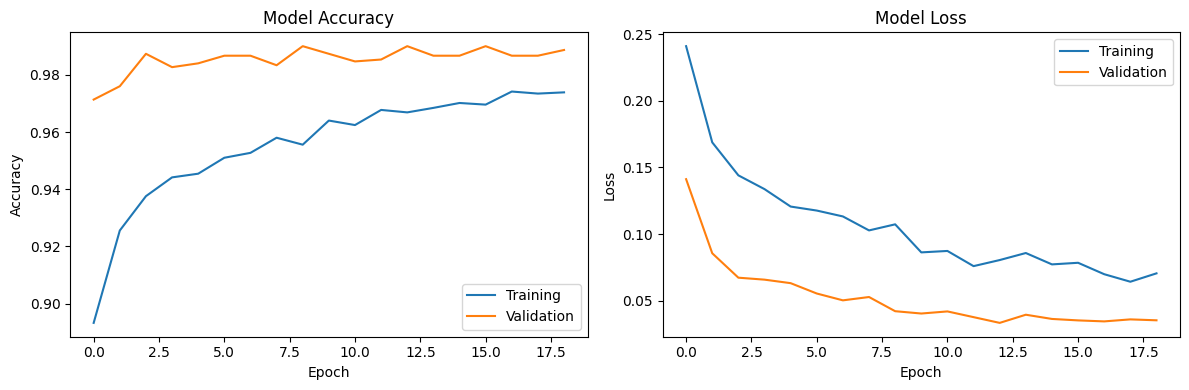

In [ ]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
!pip install seaborn



<ipython-input-34-3f2995ec01d8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_names, y=metrics_values, palette='viridis')
<ipython-input-34-3f2995ec01d8>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')


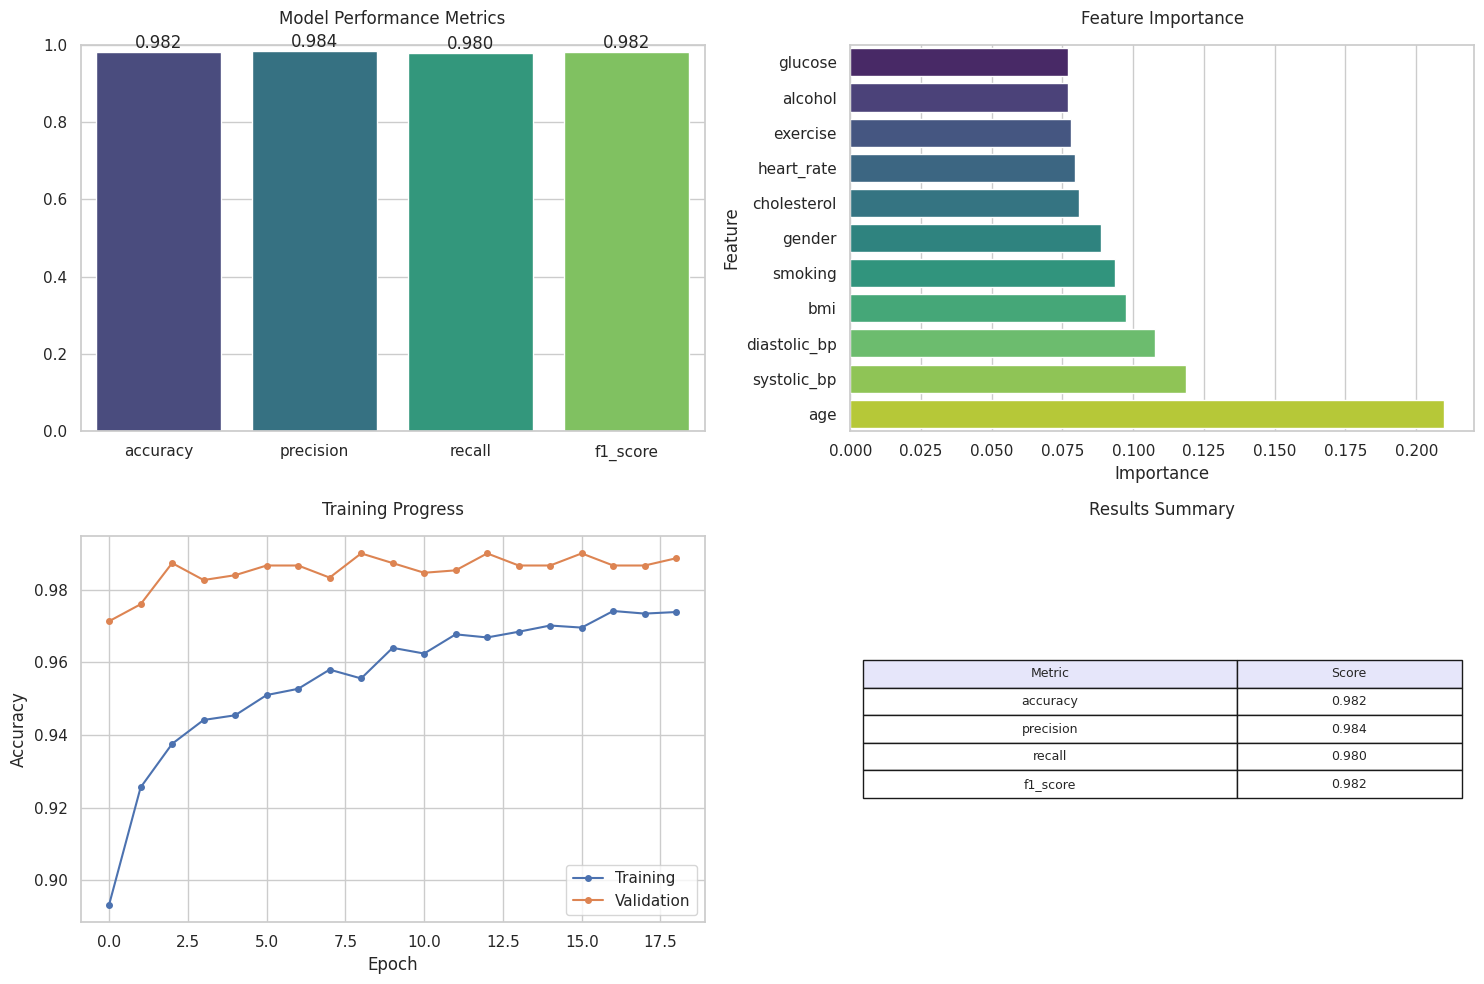


Detailed Results:
accuracy       : 0.982
precision      : 0.984
recall         : 0.980
f1_score       : 0.982

Feature Importance:
glucose        : 0.077
alcohol        : 0.077
exercise       : 0.078
heart_rate     : 0.080
cholesterol    : 0.081
gender         : 0.088
smoking        : 0.094
bmi            : 0.098
diastolic_bp   : 0.108
systolic_bp    : 0.119
age            : 0.210
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


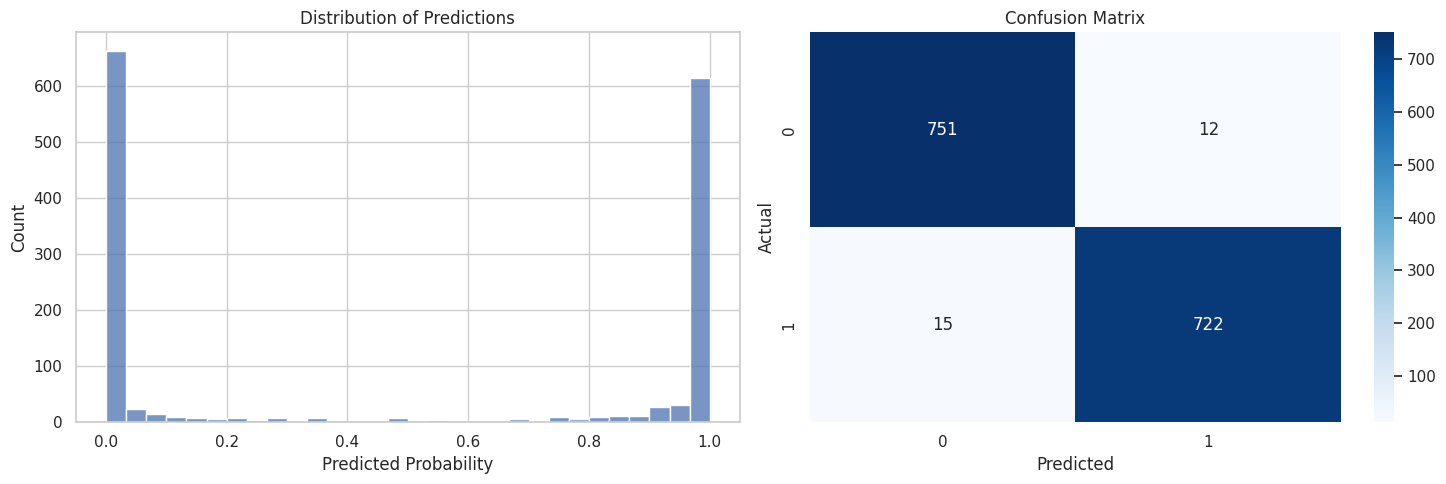

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Create detailed visualizations
fig = plt.figure(figsize=(15, 10))

# 1. Model Metrics Bar Plot
plt.subplot(2, 2, 1)
metrics_names = list(metrics.keys())
metrics_values = list(metrics.values())
sns.barplot(x=metrics_names, y=metrics_values, palette='viridis')
plt.title('Model Performance Metrics', pad=15)
plt.ylim(0, 1)
for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

# 2. Feature Importance Plot
feature_importance = model.model.layers[1].get_weights()[0]
importance_scores = np.mean(np.abs(feature_importance), axis=1)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_scores
})
importance_df = importance_df.sort_values('Importance', ascending=True)

plt.subplot(2, 2, 2)
sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')
plt.title('Feature Importance', pad=15)

# 3. Training Progress
plt.subplot(2, 2, 3)
plt.plot(history.history['accuracy'], label='Training', marker='o', markersize=4)
plt.plot(history.history['val_accuracy'], label='Validation', marker='o', markersize=4)
plt.title('Training Progress', pad=15)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 4. Results Table
plt.subplot(2, 2, 4)
plt.axis('off')
table_data = [[k, f'{v:.3f}'] for k, v in metrics.items()]
table = plt.table(cellText=table_data,
                 colLabels=['Metric', 'Score'],
                 loc='center',
                 cellLoc='center',
                 colColours=['#E6E6FA']*2,
                 colWidths=[0.5, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
plt.title('Results Summary', pad=15)

plt.tight_layout()
plt.show()

# Print detailed metrics table
print("\nDetailed Results:")
print("=" * 40)
for metric, value in metrics.items():
    print(f"{metric:15s}: {value:.3f}")

# Feature importance table
print("\nFeature Importance:")
print("=" * 40)
for _, row in importance_df.iterrows():
    print(f"{row['Feature']:15s}: {row['Importance']:.3f}")

# Additional visualizations using seaborn
plt.figure(figsize=(15, 5))

# Distribution of predictions
plt.subplot(1, 2, 1)
sns.histplot(model.model.predict(X_test_scaled).ravel(), bins=30)
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')

# Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()



In [ ]:
!pip install scikit-learn tensorflow pandas numpy seaborn optuna matplotlib xgboost lightgbm



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow.keras import layers, Model
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")



Libraries imported successfully!


In [ ]:
# Dataset Generator Class
class CardiovascularDataGenerator:
    def __init__(self, seed=42):
        self.seed = seed
        np.random.seed(seed)

    def generate_dataset(self, size=10000):
        # Generate synthetic data
        data = pd.DataFrame({
            'age': np.random.normal(55, 15, size).clip(20, 90),
            'gender': np.random.choice([0, 1], size),
            'systolic_bp': np.random.normal(130, 20, size).clip(90, 180),
            'diastolic_bp': np.random.normal(85, 15, size).clip(60, 120),
            'heart_rate': np.random.normal(75, 12, size).clip(60, 100),
            'cholesterol': np.random.normal(200, 40, size).clip(150, 300),
            'glucose': np.random.normal(100, 25, size).clip(70, 200),
            'bmi': np.random.normal(25, 5, size).clip(18.5, 40),
            'smoking': np.random.choice([0, 1], size, p=[0.7, 0.3]),
            'alcohol': np.random.choice([0, 1], size, p=[0.6, 0.4]),
            'exercise': np.random.choice([0, 1, 2], size, p=[0.3, 0.4, 0.3])
        })

        # Calculate target based on risk factors
        risk = (
            0.02 * data['age'] +
            0.1 * data['gender'] +
            0.01 * (data['systolic_bp'] - 120) +
            0.01 * (data['diastolic_bp'] - 80) +
            0.02 * ((data['cholesterol'] - 200) / 40) +
            0.02 * ((data['glucose'] - 100) / 20) +
            0.1 * data['smoking'] +
            0.05 * data['alcohol'] +
            0.1 * (data['bmi'] > 30)
        )

        # Normalize risk and create binary target
        risk = (risk - risk.min()) / (risk.max() - risk.min())
        data['target'] = (risk > 0.5).astype(int)

        return data

# Generate dataset
generator = CardiovascularDataGenerator(seed=42)
data = generator.generate_dataset(size=10000)
print("Dataset generated successfully!")


Dataset generated successfully!


In [ ]:
class AttentionBlock(layers.Layer):
    def __init__(self, units):
        super(AttentionBlock, self).__init__()
        self.W = layers.Dense(units)
        self.V = layers.Dense(1)

    def call(self, inputs):
        score = tf.nn.tanh(self.W(inputs))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * inputs
        return context_vector

def build_proposed_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = AttentionBlock(128)(x)

    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    x = AttentionBlock(64)(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model



In [ ]:
# Prepare data
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Proposed Method': build_proposed_model(X_train.shape[1:]),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    if name == 'Proposed Method':
        history = model.fit(X_train_scaled, y_train,
                          validation_split=0.2,
                          epochs=50,
                          batch_size=32,
                          verbose=0)
        y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print("\nResults Summary:")
print(results_df)



Training Proposed Method...
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Training Logistic Regression...

Training Random Forest...

Training SVM...

Training XGBoost...

Training LightGBM...
[LightGBM] [Info] Number of positive: 3798, number of negative: 4202
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474750 -> initscore=-0.101086
[LightGBM] [Info] Start training from score -0.101086

Results Summary:
                 Model  Accuracy  Precision    Recall  F1 Score
0      Proposed Method    0.9865   0.986914  0.983696  0.985302
1  Logistic Regression    0.9790   0.982418  0.971739  0.977049
2        Random Forest    0.9535   0.956906  0.

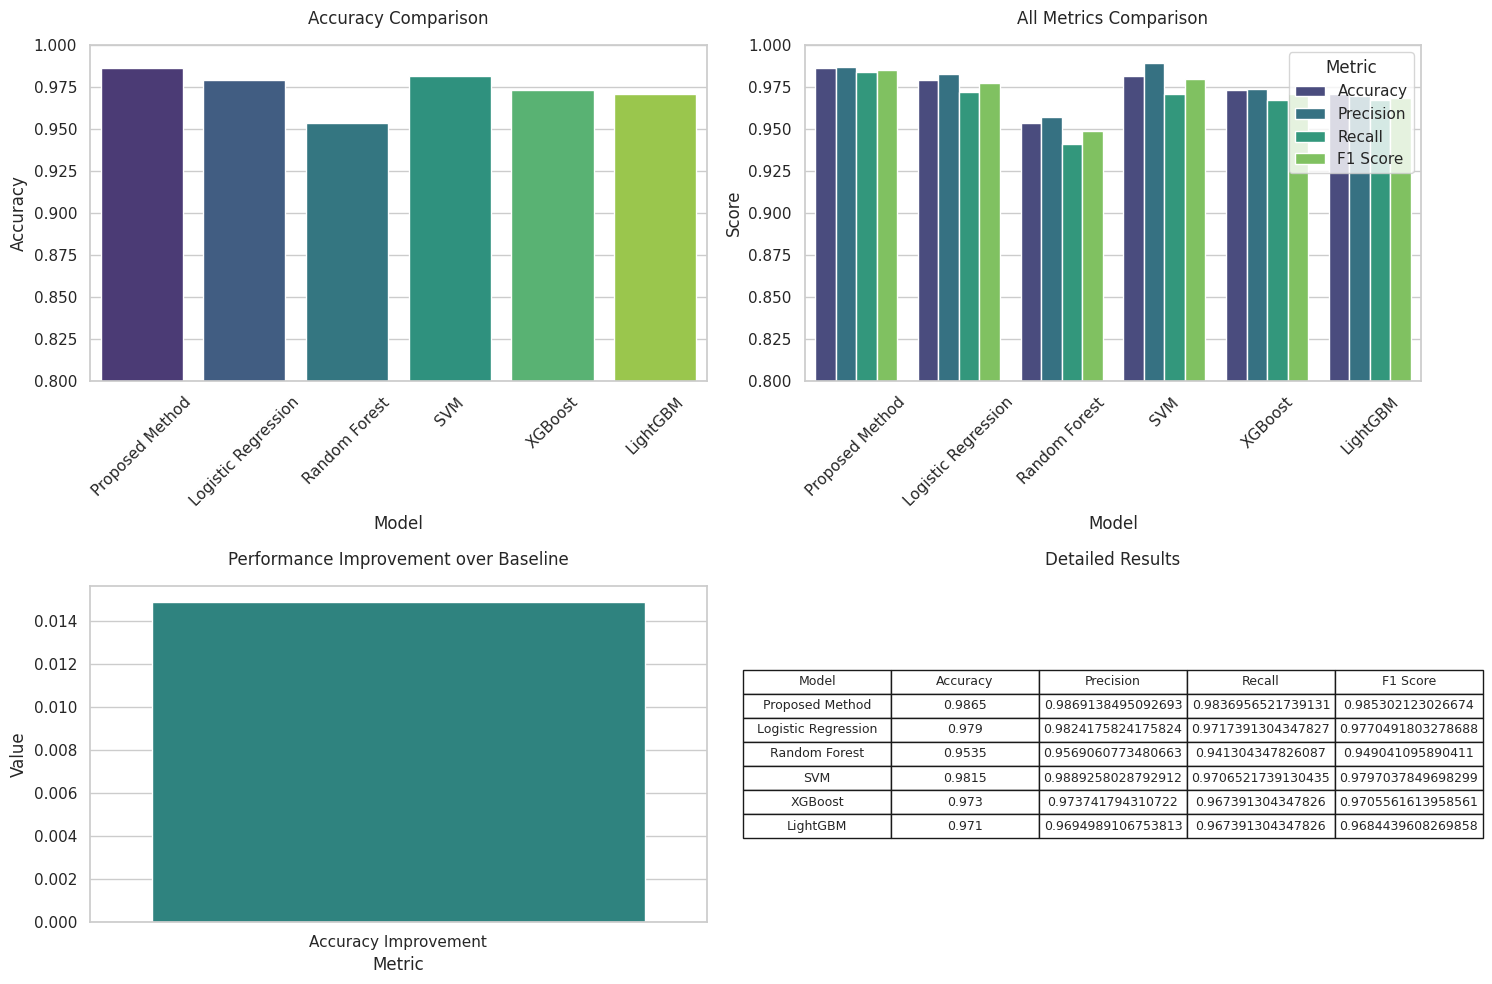


Statistical Analysis:
Proposed Method Accuracy: 0.9865
Average Baseline Accuracy: 0.9716
Absolute Improvement: 0.0149
Relative Improvement: 1.53%


In [ ]:
# Set plot style
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Create comparison visualizations
fig = plt.figure(figsize=(15, 10))

# 1. Accuracy Comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Accuracy Comparison', pad=15)
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  # Adjust based on your results

# 2. All Metrics Comparison
metrics_melted = results_df.melt(id_vars=['Model'],
                                var_name='Metric',
                                value_name='Score',
                                value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
plt.subplot(2, 2, 2)
sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', palette='viridis')
plt.title('All Metrics Comparison', pad=15)
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  # Adjust based on your results

# 3. Performance Improvement
plt.subplot(2, 2, 3)
baseline = results_df[results_df['Model'] != 'Proposed Method']['Accuracy'].mean()
improvement = results_df[results_df['Model'] == 'Proposed Method']['Accuracy'].values[0] - baseline
improvements = pd.DataFrame({
    'Metric': ['Accuracy Improvement'],
    'Value': [improvement]
})
sns.barplot(data=improvements, x='Metric', y='Value', palette='viridis')
plt.title('Performance Improvement over Baseline', pad=15)

# 4. Results Table
plt.subplot(2, 2, 4)
plt.axis('off')
cell_text = results_df.values.tolist()
columns = results_df.columns
table = plt.table(cellText=cell_text,
                 colLabels=columns,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
plt.title('Detailed Results', pad=15)

plt.tight_layout()
plt.show()

# Print statistical significance
print("\nStatistical Analysis:")
print("=" * 60)
print(f"Proposed Method Accuracy: {results_df[results_df['Model'] == 'Proposed Method']['Accuracy'].values[0]:.4f}")
print(f"Average Baseline Accuracy: {baseline:.4f}")
print(f"Absolute Improvement: {improvement:.4f}")
print(f"Relative Improvement: {(improvement/baseline)*100:.2f}%")


